# Tutorial 7: PDEs, electrostatics via Finite Differences (FD)

In this tutorial, you will explore how to solve partial differential equations (PDEs) using the finite differences (FD) method. More specifically, we will focus ourselves on solving for the electrostatic potential within two wirefram geometries.

### Preliminary steps:
1. Review sections 19.1, 19.2 and 19.4 on PDE properties, electrostatic potentials and the FD algorithm for the electrostatic potential, respectively and answer the following questions:
    - What are the differences between Elliptic, Parabolic and Hyperbolic partial differential equations (PDEs)?
    - Whis is solving a PDE numerically more involved than an ODE (in other words: why can we not use the RK4 algorithm, for example)?
    - What are the differences between Dirichlet, Neumann and Cauchy boundary conditions?
2. Review the following concepts:
    - Forward differences approximation
    


## Exercise 1: Getting warmed up: solving for the electrostatic potential in a partially charged wireframe (19.4.2)
To get you familiarized with the FD method,  you will first solve a simple system: Your problem is to find the electric potential for all points inside a charge-free square shown below in Figure 1. The bottom and sides of the region are made up of wires that are “grounded” (kept at 0 V). The top wire is connected to a voltage source that keeps it at a constant value of 100 V. You can assume that the ends of the charged wire (so the first and the last element) are actually parts of the grounded wires as well.
<figure>
<center>
<img src="https://lh3.googleusercontent.com/Oq3Pq_snchBMrERA7x4yVA72j2Vd1Kn91sOMiZmoLLOW-X4XhtbAEJWQVWWbN1ucN42mb6a_srioDi5vhtXeR8EXenhYJ7MoH7qSP1AzIGQDrSElNuBa12kSHnxGYExyXSrXljwLmn91KPKWMi2RDenD3JD_NMzw0mt9UsamWoDvyPmVZ0Edl8wRJyjmxg3hGBV5G34w_2-Kp3UnFgs-wRj4KiYt7PdQeP6o68YKFV3J8qWp1tI5zSx98eEzJPybpGEtoz5X8CmNojjF4n7v5H_v9SDVkG4j2dA_3q_oLY40fvTb-6c9WxT45cQkQUaMQv67gbFpUETiu8gfOi-h62eq0_6f1exUeEALrU9cz5oAszFKHicpiRRMyw8omgd5noDhNMSNWYt4t5mN5W3EovlMa8ABRfH4L1nbC7kTaJTKyB3dxUjUwnWRKtfrGTCRPvjkkCJ508wtQo0t1B8shSBmrUpbLe5o6idzCibz_wXgqi-dmFsiNanJyiChocC4LxuyXRlbO92txBXOXuZdoxnnc6s5oMNuuevnN0Ji5l0l8VA2ys1dqd8DaC1Q1Y8zZuQClpztPyUm83cWF_t2cPzw0WrHgIzIs81vjeRcXbYCZXrepmgjDhv_qMj0aqNkQb_28vV3Qq5X3jGsL-J7jT3IhJuAe-a4Ur5-vVt8NsviXi19Pk_Wba-aPErdmvfzZ6LWkYLQ2DaVFw3pyvvN3yueVbCpxoON9Qr36S30KG7ptg=w625-h680-no" width="240px" title="The partially charged wireframe" alt="Figure 1">
<figcaption>
<b>Figure 1.</b>
<i>Charge-free wireframe with a voltage applied to the top wire. The wires define the boundary conditions for this problem.</i></figcaption>
</center>
</figure>




#### Part 1: Defining the PDE, boundary conditions and the FD algorithm for this problem

In general, the electrostatic potential $U(\mathbf{x})$ obeys the below PDE (a Poisson's equation) in presence of stationary charges distributed with a density $\rho(\mathbf{x})$. 

$$\nabla^2 U(\mathbf{x}) = -4\pi\rho(\mathbf{x}) $$

In case no charges are present (as is the case for the wireframe), the right hand side drops out (i.e. it becomes a Laplace equation).


1. What kind of PDE's are the electrostatic equations (both cases)? 
2. Review the system of interest (see Figure 1) and the description in the introduction. What kind of boundary conditions apply for our problem? Can you actually find a unique and stable solution for this problem?

On to the finite differences algorithm: Upon using a forward differences approximation, we can express the components of the Nabla-operator in two dimensions (our wireframe is 2D) in the following way:

$$ \begin{array}{l}{\frac{\partial^{2} U(x, y)}{\partial x^{2}} \simeq \frac{U(x+\Delta x, y)+U(x-\Delta x, y)-2 U(x, y)}{(\Delta x)^{2}}} \\ {\frac{\partial^{2} U(x, y)}{\partial y^{2}} \simeq \frac{U(x, y+\Delta y)+U(x, y-\Delta y)-2 U(x, y)}{(\Delta y)^{2}}}\end{array} $$

3. Use the above approximation, together with the definition of the electrostatic potential, to show that we can express the solution $U_{i,j}$ in a Finite Differences (FD) algorithm as:

$$  U_{i,j} = \frac{1}{4}\big[U_{i+1,j}+U_{i-1,j}+U_{i,j+1}+U_{i,j-1}\big] + \pi\rho(i\Delta,j\Delta)\Delta^2 \,,$$ 

where $U_{i,j}$ is the potential at grid point $(i,j)$, $\rho$ the local charge density and $\Delta$ the grid step size (i.e. $(x+\Delta{x})$ would correspond to a position $(i+1)$). To get a feeling for how the solution at a point $(i,j)$ is formed by its neighbors, see Figure 2 below.

<figure>
<center>
<img src="https://lh3.googleusercontent.com/AGps70U9ZG_9PYgbZ6Av1Y4kbzV573b_moPmzCoXHwCGUIgYkdMCzJOsV7P2ZkZ1XotkBrod79sFwe7eOcjFU6sbTzIlRFiravC9Eyh0QAwJxmccQIjOzrYAV26YZOQWOWzdUBzKDsF8l1sPB8leHihf_5IhQVl9YXfOVZhJppyRDye8fV9SsRajIalc4Pjjjj7gA6-hTpzEpto5_7BX6Jub6nc_21kZFFBpDpRmyJjxKIfi65rwKJsqoF17E2YL4Dp-kW69RhwoXzDfZJ6ASbVKZxAhxxTexnDiowDzhxbWsZZhIKjrlgT66wG7ANkNZngWDLl45GZRc5AjvUcOQfV8uu8bux9ID-FHVQhKrEMH0109Kwn4WM86tFyPTdC7oumGs46evhbLFGv0MNcLy289ZT5P0KV3Z13tfjQ8dEOjiMg4ENJiowc-cZrdRyc9PHeJ7dKZbOjW9ibCYPQ44ktXYmrohZZLHbsovpXso1XKrzHsMji_Pfy0LhqSfxKDNNDA0d1cyTx74eYIda4uHe9kFRShq24XESzF5coTS0hxZ6IJjNZgBqGVE7rNi1O_nLA5pkBWAs4NHaAddUW8Uau3am3-u61lk92cKjAzMwjkrzrXNUfonP3EJa0WoZqnSWKyFT372D_XYCe4LozeXzzMZIO3RxCoQ_P6wEZhlOXSWNw422q7AnbQ4jY3xNvHSeze_lsFFhulczLef7mC9WuQUmWQOf8GGenNk_x8rjfaHQ=w1374-h1038-no"  width="480px" title="Update rule" alt="Figure 2">
<figcaption>
<b>Figure 2.</b>
<i>The solution at a grid point $(i,j)$ is determined from the solutions at surrounding gridpoints. In the FD algorithm, we iterate over all grid points, and update all the potential values based on their neighbors. This process is repeated until the solution converges.</i></figcaption>
</center>
</figure>

#### Part 2: Writing the code

In the below code cell, we did some of the work for you. It is your task to complete the function that calculates the solution for the wireframe problem. Note: we assume a unity spacing ($\Delta=1$) and 100 grid points in either direction for this problem, for now. Also, there are no charges in the wireframe: what does this imply for your implementation of the FD algorithm?

1. Initialize a `num_gridpoints` by `num_gridpoints` numpy array that stores the solution. For now, have it contain only zeros.
2. Define the top boundary condition: Set the solution for all the elements in the top row to 100, with the exception of the first and the last element (these are parts of the grounded wires).
3. 
    1. Write a short pseudocode that describes how you want to update the solution at all grid points. Make sure to take the boundary conditions into account (the solution values at the edges of the grid shouldnt' be updated!). Also, make sure to store the updated solution values in a temporary array while you checking all grid points. Afterwards, you can copy the temporary array back to your solution array.
    2. Implement your pseudocode. Make sure to copy your temporary array into your solution array using `np.copy()` or `copy.deepcopy()` to prevent issues with pointing to memory slots. Write a loop around the FD-algorithm such that you call it a `num_iterations` number of times.
4. We give you a plotting function `create_plots` that takes as input arrays for $x$, $y$ and $U(x,y)$. It will generate both generate a 2D contour and a 3D surface plot.





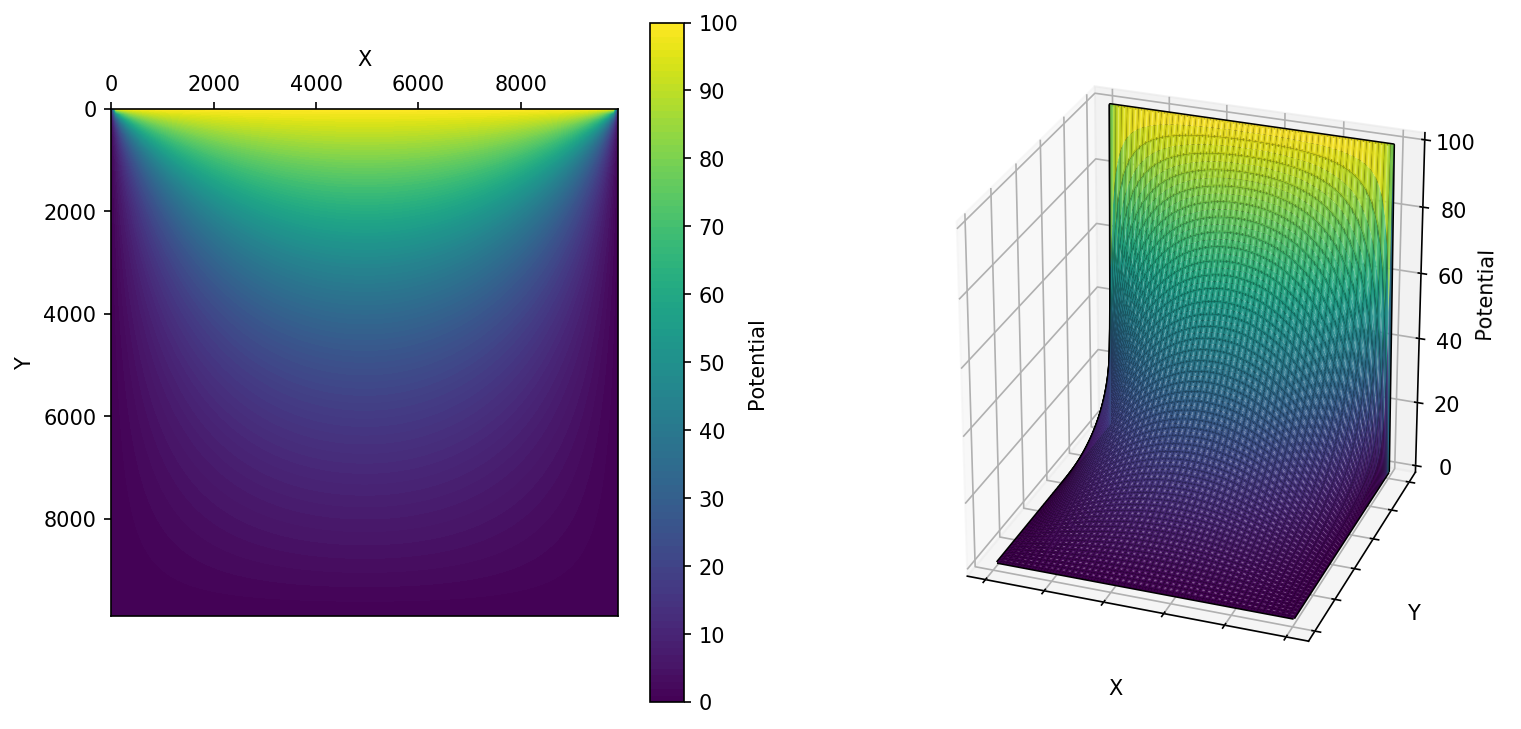

In [13]:
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from copy import deepcopy
%matplotlib inline

def create_plots(X, Y, Z, colorrange=(0, 100), cm='viridis', Zname='Potential'):
    '''
    This function is given in order to help you visualize your results more quickly
    Plots Z(x,y). Colors are based on the range and colormap given as inputs
    '''
    fig = plt.figure(figsize=(12,6), dpi=150)

    ax1 = fig.add_subplot(1,2,1)
    ax1.set_aspect('equal')
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top') 
    ax1.invert_yaxis()
    levels = np.linspace(colorrange[0],colorrange[1],101)
    ticks = np.linspace(colorrange[0],colorrange[1],11)
    cntr = ax1.contourf(X, Y, Z, levels, cmap=cm)
    ax1.set_xlabel('X')                                     
    ax1.set_ylabel('Y')
    cbar = fig.colorbar(cntr)
    cbar.set_ticks(ticks)
    cbar.set_label(Zname)
                                  
    ax2 = fig.add_subplot(1,2,2,projection='3d')  
    X, Y = np.meshgrid(X, Y)                                
    ax2.plot_wireframe(X, Y, Z, color = 'k')                
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    ax2.set_xlabel('X')                                     
    ax2.set_ylabel('Y')
    ax2.set_zlabel(Zname)

    #Add some color to highlight the potential value. Note: 'viridis' is a great color-
    #map to use, since it is colorblind-friendly and has a uniform spacing in color 
    #scale and intensity. 
    ax2.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap=cm, edgecolor='none', alpha=0.9)

    #rotate the plot
    ax2.view_init(25, 110)
    #plt.show()    

    return [ax1, ax2]

def set_border_conditions(Z):
    Z[0,:]  = [100]*len(Z)
    Z[-1,:] = [0]*len(Z)
    Z[:,0]  = [0]*len(Z)
    Z[:,-1] = [0]*len(Z)
    
    return Z

def calculate_top_wire_grid(num_gridpoints=100, num_iterations=2500):
    '''
    calculate_top_wire_grid: takes a number of grid points and a number of 
    iterations (set defaults to 100, 2500) and returns the electrostatic potential
    after a num_iterations amount of steps.
    
    '''
  
    #1. Initialize the potential:
    Z = np.zeros([num_gridpoints,num_gridpoints])

    
    #2. Set the initial condition, which is that the top wire has a +100 potential value
    #   we skip the edges and treat them as parts of the grounded wires
    Z = set_border_conditions(Z)

    
    #3. Iterate over the grid points, but REMEMBER: how do you implement the boundary
    #.  conditions properly?
    
    sum_Z = np.sum(Z)
    while True:
        u = np.roll(Z.copy(), 1, axis=0)
        d = np.roll(Z.copy(), -1, axis=0)
        l = np.roll(Z.copy(), 1, axis=1)
        r = np.roll(Z.copy(), -1, axis=1)
        
        Z = (u+d+l+r)/4        
        Z = set_border_conditions(Z.copy())
        if sum_Z == np.sum(Z):
            break
        sum_Z = np.sum(Z)
    X  = Y = np.arange(0,num_gridpoints)*num_gridpoints
    return X,Y,Z
  
X,Y,Z = calculate_top_wire_grid()
            

## Plotting
create_plots(X, Y, Z)
plt.show()


## Exercise 2: Parallel plate capacitors (2D) and convergence analysis of FD (19.7)

Technically, the code for the first exercise was oversimplified; the algorithm assumes a grid spacing $\Delta=1$, and does not use any accelerated convergence schemes. When the maximum amount of grid points in any direction is changed, the size of the system scales acccordingly: this does not allow us to investigate the accuracy of the FD algorithm! In this exercise, you will investigate the use of the FD algorithm on a  more interesting physical system, namely a parallel plate capacitor with fixed charges (see the Figure 3). In practice, capacitors of varying geometries are often used to (temporarily) store energy. In a parallel plate capacitor, this happens by placing two paralell plates close to each other and by placing positive and negative charges on both plates, respectively. An electric field forms between the two plates, in which the energy is stored. 

<figure>
<center>
<img src="https://lh3.googleusercontent.com/TpXl26xlUfXbV8aji6SSfTyP8q7dH1qVhVck1cvD-VmLlvBeMaKAM-_hsKbZYEMTds9jOqf1MZBUIzpC5gmZwBToLSgGn-gNU3gXEP2CdhdbttXN5hvrq5GsGxyUZ-hm-5Smkg2YeyH2nUYPmJmAGnxDGvGqCUf6b_M_M_UQ2_674MYsD9yTjA3sz6FBcmanuKwMU8ehHSO6AUpS46aY1vHf4fl_bLN1T1ndit4LtXCcuAM29wYe8-U_2lII2ynt1jGY8S1Ee1JrllrXygeE5lW3EflQyCmokSn_yd1glppqUzmZsnKukf3uOXoQOI7kOc7zNqhNL2GG4HKS7QVgCO6DIFwgSNcGhzPeILb2EHJggAXE65YfKKGTUhuN1nCgXIQieLYs69W0PfOF6trucBtgbKEcYkiWYgtB_wq72BCss1-cRqBzf1UUu6m03CoLO2tTdYb3xdZ37B8E3-elacOwNb4lVlMWhNG20vOVrKNqX2iHlsQMYDn5bf22A56j8-cjE7Oe08m_j2g0ANibiIWforhITIsgP62bXNAujYmcmZ2ek1MyozIOhJ5dIKZAAA0IaBfLuv6iW9YzjxhO7gI-C7X8mKrVeWUsqkXziQudLWu4-N-KDRyU85Dbdy3BPTypltiCjPcTv9dslU29pCLNa5Et43t7fpzK8-wdJn4TQGgxDEsHxNgE5D4xwMNJEqKLvR8fPap9pznQj6ZCJQP0Fv8BpvQJbbt2u2pcrdNSdQ=w672-h714-no"  width="320px" title="Parallel-plate capacitor" alt="figure-parallel-plate.png">
<figcaption>
<b>Figure 3.</b>
<i>A parallel plate capacitor setup. The capacitor plates of length $L$ and width $W$ are placed at some distance $d$ apart in a square system that is grounded at its boundaries. Colors indicate charge density: at red,  $\rho(x,y)=+\rho$, at blue, $\rho(x,y)=-\rho$ and in the grey region we take $\rho(x,y)=0$. </i></figcaption>
</center>
</figure>


### Questions and programming tasks:
In order to simulate the case of the parallel plate capacitor, you can re-use some parts of the above code. We provided some parts of the code in the code cell below.

1. Write the code such that you generate a 1 by 1 box where you can specify the number of grid points. From this, you can determine the grid resolution $\Delta$. Have the code create a numpy-array `U` that will contain the position-dependent potential $U_{i,j} = U(i \Delta, j\Delta)$.
1. Create a numpy-array `rho` containing the position-dependent charge density $\rho(x,y)$ using the function we wrote for you. **Make sure to understand the function, as you will need to change some settings later on.**
1. Complete the function `update` that updates the nodal values of the potential field using the Jacobi update rule given `U`, `rho` and `delta`. 

 *NOTE:* Take into account the boundary conditions! We assume that the outer box (or frame, in 2D) is grounded, which means that $U=0$ at the edges of the grid. How does this change the implementation of the boundary conditions relative to the previous exercise?
1. With your parallel plate capacitor in place, perform simulations for a varying number of iterations, starting from a small value up to a value at which you do not see any notable changes anymore in the visual solution. Pick values of the capacitor height and length, such that the plates do not touch the edge of the grid, and are placed away from each other (see the above figure).

 *NOTE*: when using the plot function, you should now supply the arguments `colorrange=(-100,100)` and `cm='bwr'` to switch to a diverging colormap that ranges from -100V to 100V (you can change the limits if you want).
1. Find a value for the charge density assigned to both plates that leads to a potential of +100V on one plate, and -100V on the other plate, judging from your plots.
1. Place the plates near each other, and investigate whether: 
 - you can find a linear drop in electric field between the plates (create a line plot along the center of the system) and 
 - you can observe so-called 'fringe' fields, which are non-zero values of the electrostatic potential that fall outside of the linear region between the two plates.
1. Implement a convergence criterion. For example, break the loop if the change in maximum value (`np.max`) of the potential is less than 1 part in a million. Other criteria are possible: in the book it is suggested to have a look at the trace of the numpy-array (`np.trace`) and break when this is no longer significantly changing. 
 - Update the function `update` such that apart from the new field values it also returns the measure you use for a stopping criterion.
 - In your main loop, check if the stopping criterion is met. If yes, break the loop.
1. A lot of speed-up can be achieved by switching from the Jacobi update rule to Gauss-Seidel (GS) or Successive Over-Relaxation (SOR). The SOR rule is given by
$$
U^{(\text{new})}_{i, j} = (1-\omega) U^{(\text{old})}_{i, j} + \omega \left( \frac{1}{4}\left( U^{(\text{old})}_{i-1, j} + U^{(\text{new})}_{i+1, j} + U^{(\text{old})}_{i, j-1} + U^{(\text{new})}_{i, j+1} \right) + \Delta^2\pi\rho_{i, j}\right)
$$
Note that it uses updated values where possible. For $\omega=1$, this turns into the Gauss-Seidel update rule.
 - Extend (or create a second) `update` function to include the SOR update rule.
 - Repeat the simulations. Find an optimal setting for $\omega$ that minimizes the number of iterations for a given $N$-value.




Iteration 640 (max 10000). Latest relative change 1e-06 (tolerance 1e-06). Max voltage 88.5358106384749449

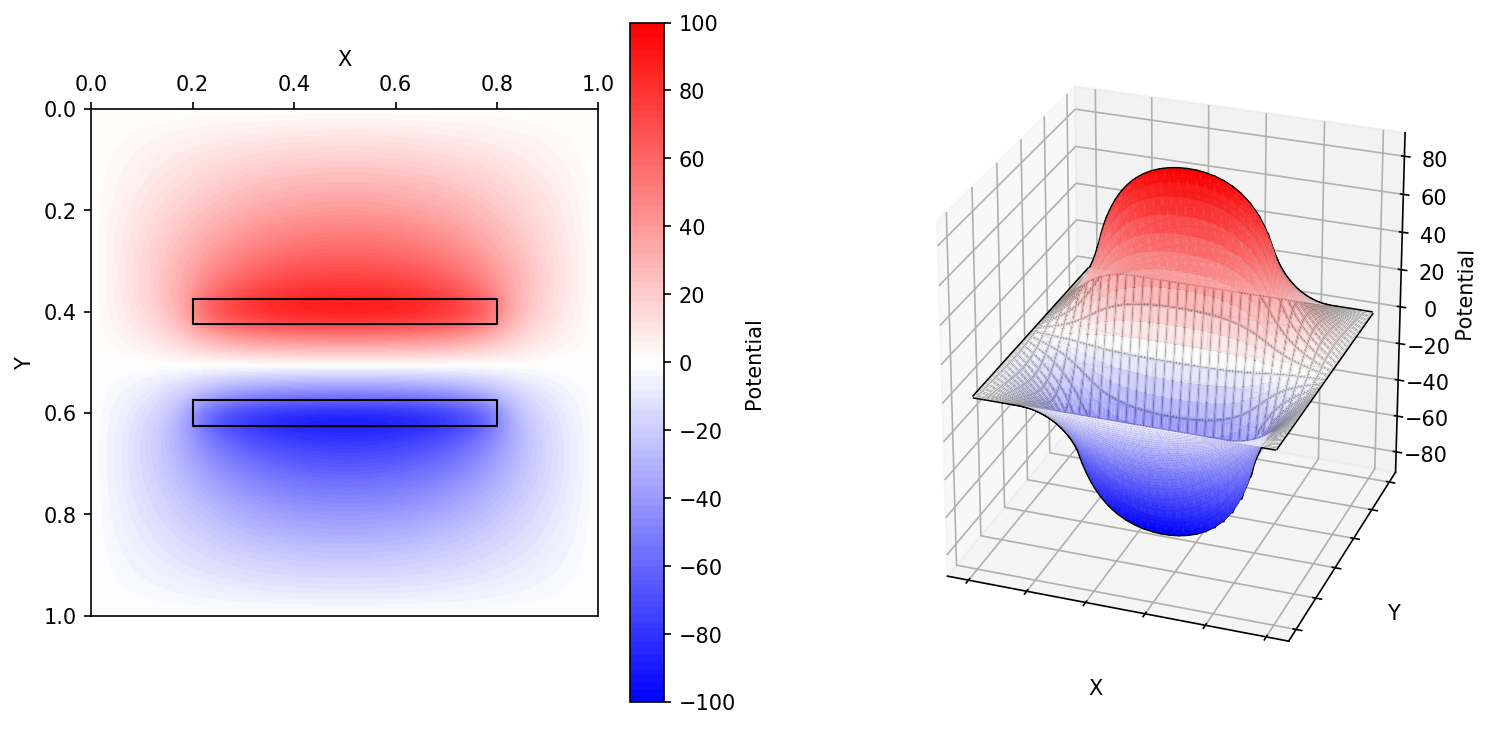

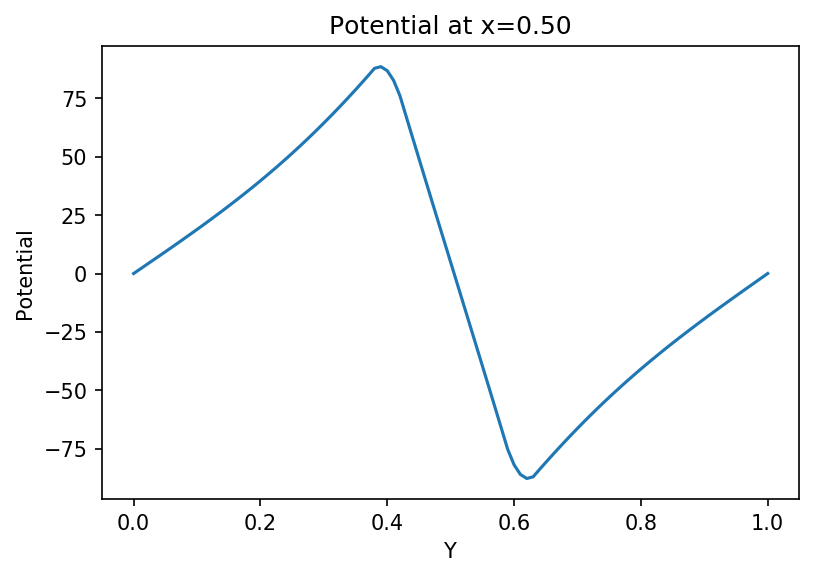

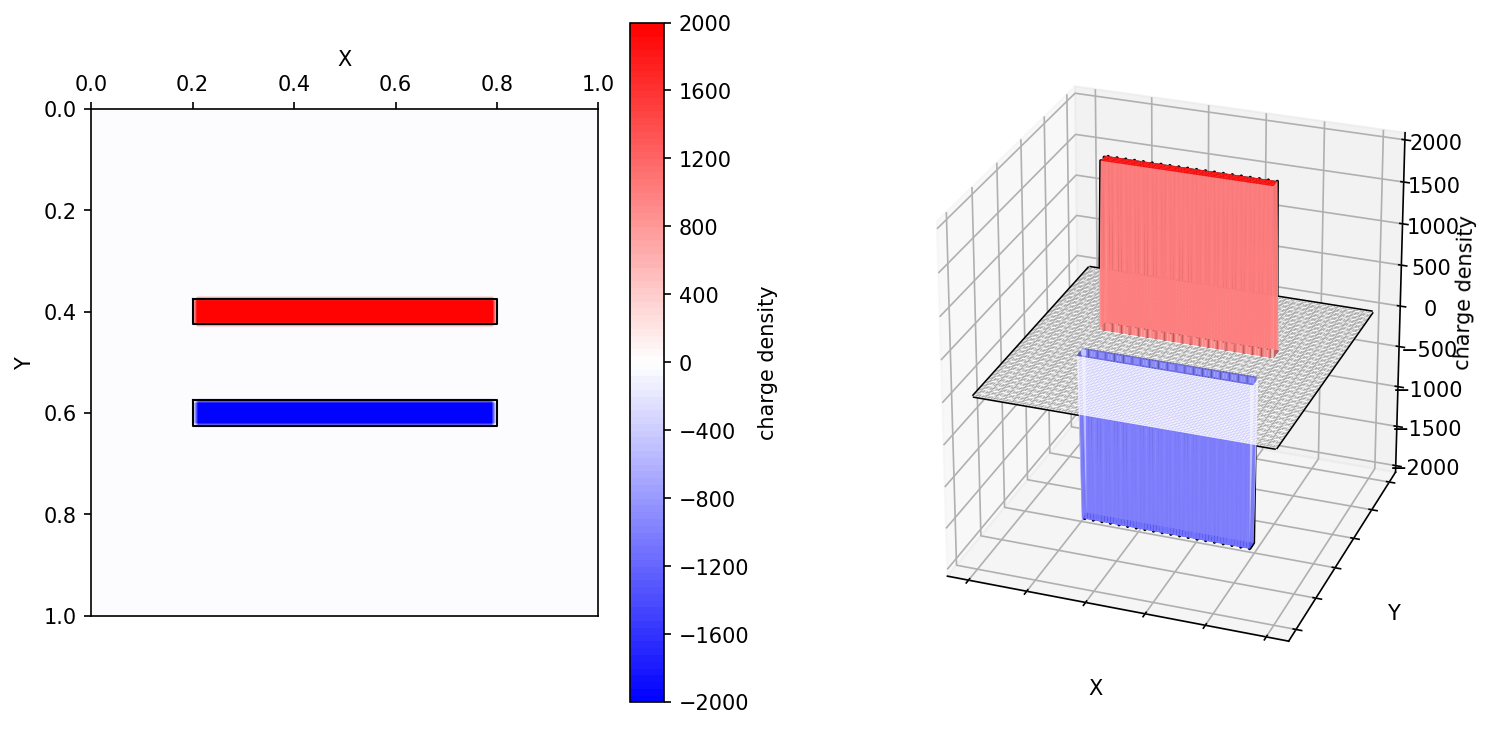

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def place_charges_on_capacitor(num_points, delta, plate_width=0.05, 
                               plate_length=0.6, plate_separation=0.2, 
                               charge_density_plate=10):
    
    rho = np.zeros([num_points,num_points])
        
    begin_plate_x = 0.5*(1.-plate_length)
    begin_plate_bot_y = 0.5*(1. - plate_separation - plate_width)
    begin_plate_top_y = 0.5*(1. + plate_separation - plate_width)

    for i in range(num_points):
        current_x = i*delta
        
        if (current_x > begin_plate_x) and (current_x < begin_plate_x + plate_length): 
          
            for j in range(num_points):
                current_y = j*delta
                
                if (current_y > begin_plate_bot_y) and (current_y < begin_plate_bot_y + plate_width):
                    rho[i,j] = charge_density_plate
                elif (current_y > begin_plate_top_y) and (current_y < begin_plate_top_y + plate_width):
                    rho[i,j] = -charge_density_plate

    # This was just for plotting purposes                
    plate_bot = [[begin_plate_x, begin_plate_x+plate_length, begin_plate_x+plate_length, begin_plate_x, begin_plate_x],
                 [begin_plate_bot_y, begin_plate_bot_y, begin_plate_bot_y+plate_width, begin_plate_bot_y+plate_width,begin_plate_bot_y]]
    
    plate_top = [[begin_plate_x, begin_plate_x+plate_length, begin_plate_x+plate_length, begin_plate_x, begin_plate_x],
                 [begin_plate_top_y, begin_plate_top_y, begin_plate_top_y+plate_width, begin_plate_top_y+plate_width,begin_plate_top_y]]

    return rho.T, [plate_bot, plate_top]
  
def update(V, rho, delta, method='Jacobi', w=1.):
    '''
    Updates the interior points of the potential (assuming Dirichlet 
    conditions on the outer boundaries) using either Jacobi or SOR scheme
    w is only used in case of SOR (w=1 gives Gauss-Seidel)
    '''

    # Initialize V and a copy of it
    V_copy = V.copy()

    # Create a copy of the list for Jacobi and relative "error"

    if (method=='Jacobi'):
        V_jacobi = V.copy()
        for x in range(1, len(V)-1):
            for y in range(1, len(V)-1):
                l = V[x-1,y]
                r = V[x+1, y]
                u = V[x, y-1]
                d = V[x, y+1]

                V_jacobi[x, y] = (l+r+u+d)/4 + np.pi * rho[x, y] * delta**2
        V = V_jacobi.copy()

    elif (method=='SOR'):
        # use updated values immediately (Gauss-Seidel)
        V_SOR = V.copy()
        for x in range(1, len(V)-1):
            for y in range(1, len(V)-1):
                l = V_SOR[x-1,y]
                r = V[x+1, y]
                u = V_SOR[x, y-1]
                d = V[x, y+1]

                V_SOR[x, y] = (1-w)*V[x, y] + w*((l+r+u+d)/4 + np.pi * rho[x, y] * delta**2)
        V = V_SOR.copy()
            

    return V, abs(np.max(V)-np.max(V_copy))
  
def calculate_PP_capacitor(num_points=250, num_iterations=2500,
                           charge_density_plate=10, tol=1e-3):
    '''
    Calculates the electrostatic potential within a parallel plate capacitor.
    Inputs are the size of the system (size x size), the grid spacing, and
    the number of iterations.
    '''
    delta = 1/num_points
    V = np.zeros([num_points, num_points])
    rho, platecoords = place_charges_on_capacitor(num_points, delta, charge_density_plate=charge_density_plate)

    #program starts here.
    for iter in range(num_iterations):  
                                 
        V, err = update(V, rho, delta, method='SOR', w=1.9)



        if (iter % 10 == 0):
            print('\rIteration {} (max {}). Latest relative change {:.2g} (tolerance {:.2g}). Max voltage {}'.format(iter, num_iterations, err, tol, np.max(V)), end='')

        if err <= tol:
            break
                

    X = Y = np.linspace(0., 1., num_points)                  
    Z = V

    return X, Y, Z,  platecoords



N = 101
X,Y,Z,platecoords = calculate_PP_capacitor(num_points=N, charge_density_plate = 2000, 
                                                 num_iterations=10000, tol=1e-6)


####
####

axes = create_plots(X, Y, Z, colorrange=(-100, 100), cm='bwr')
axes[0].plot(platecoords[0][0], platecoords[0][1], c='k', lw=1)
axes[0].plot(platecoords[1][0], platecoords[1][1], c='k', lw=1)
plt.savefig('parallel-plate_potential.png')
plt.show()

fig, ax = plt.subplots(dpi=150)
ax.plot(Y, Z[:, int(0.5*N-0.5)])
ax.set_xlabel('Y')
ax.set_ylabel('Potential')
ax.set_title('Potential at x={:.2f}'.format(X[int(0.5*N-0.5)]))
plt.savefig('parallel-plate_potential-slice.png')
plt.show()

rho, platecoords = place_charges_on_capacitor(N, 1./(N-1), charge_density_plate=2000)
axes = create_plots(X, Y, rho, colorrange=(-2000, 2000), cm='bwr', Zname='charge density')
axes[0].plot(platecoords[0][0], platecoords[0][1], c='k', lw=1)
axes[0].plot(platecoords[1][0], platecoords[1][1], c='k', lw=1)
plt.savefig('parallel-plate_charge-density.png')
plt.show()